## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Combine the data into a single dataset
single = pd.merge(mouse_metadata, study_results, left_on='Mouse ID', right_on='Mouse ID', how='left', sort=False)
single.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
regi=single.groupby(['Drug Regimen','Timepoint'])
regi.first()

Mouse ID     Sex  Age_months  Weight (g)  \
Drug Regimen Timepoint                                            
Capomulin    0             s185  Female           3          17   
             5             s185  Female           3          17   
             10            s185  Female           3          17   
             15            s185  Female           3          17   
             20            s185  Female           3          17   
...                         ...     ...         ...         ...   
Zoniferol    25            a401  Female           8          25   
             30            a401  Female           8          25   
             35            a401  Female           8          25   
             40            a401  Female           8          25   
             45            a401  Female           8          25   

                        Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Timepoint                                        
Capomulin    0                   45.000000                 0  
             5                   43.878496                 0  
             10                  37.614948                 0  
             15                  38.177232                 0  
             20                  36.866876                 0  
...                                    ...               ...  
Zoniferol    25                  54.209836                 3  
             30                  55.910162                 3  
             35                  60.347145                 3  
             40                  61.768605                 4  
             45                  66.794156                 4  

[100 rows x 6 columns]

In [5]:
single.to_excel("pyma.xlsx")

## Summary statistics

In [7]:
unique=single['Drug Regimen'].unique()
unique

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Capo=single[single['Drug Regimen']=='Capomulin'].groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.mean),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.median),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.var),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))
Ceft=single[single['Drug Regimen']=='Ceftamin'].groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.mean),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.median),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.var),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))
Infu=single[single['Drug Regimen']=='Infubinol'].groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.mean),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.median),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.var),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))
Place=single[single['Drug Regimen']=='Placebo'].groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.mean),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.median),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.var),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))
Keta=single[single['Drug Regimen']=='Ketapril'].groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.mean),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.median),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.var),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))
Nafti=single[single['Drug Regimen']=='Naftisol'].groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.mean),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.median),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.var),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))
Prop=single[single['Drug Regimen']=='Propriva'].groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.mean),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.median),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.var),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))
Rami=single[single['Drug Regimen']=='Ramicane'].groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.mean),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.median),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.var),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))
Stel=single[single['Drug Regimen']=='Stelasyn'].groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.mean),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.median),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.var),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))
Zoni=single[single['Drug Regimen']=='Zoniferol'].groupby('Drug Regimen').agg(
    Mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.mean),
    Median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.median),
    Variance=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.var),
    Standard_Deviation=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=np.std),
    SEM=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc=st.sem))

In [9]:
#append all separate groupby queries into a single df
al=Capo.append(Ceft, ignore_index = False)
al=al.append(Infu,ignore_index = False)
al=al.append(Keta,ignore_index = False)
al=al.append(Nafti,ignore_index = False)
al=al.append(Place,ignore_index = False)
al=al.append(Prop,ignore_index = False)
al=al.append(Rami,ignore_index = False)
al=al.append(Stel,ignore_index = False)
al=al.append(Zoni,ignore_index = False)
al

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [10]:
#Groupby drug regimen with .count and mouse id to determine the datapoints
datapoints = single.groupby(["Drug Regimen"]).count()["Mouse ID"]
datapoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

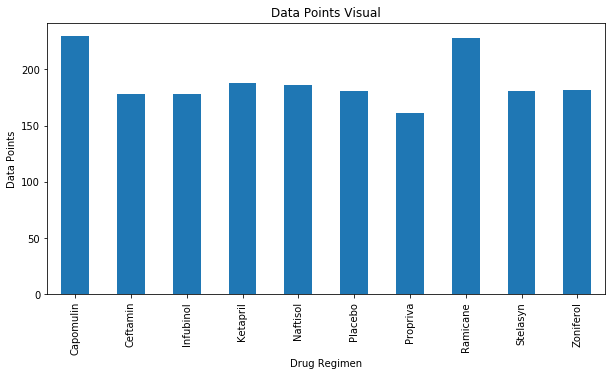

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapoints.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

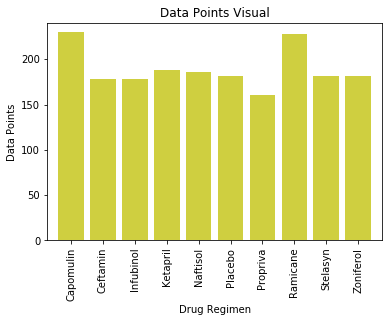

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

Regime = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(datapoints))

plt.bar(x_axis, Regime, color='y', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(Regime)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


## Pie plots

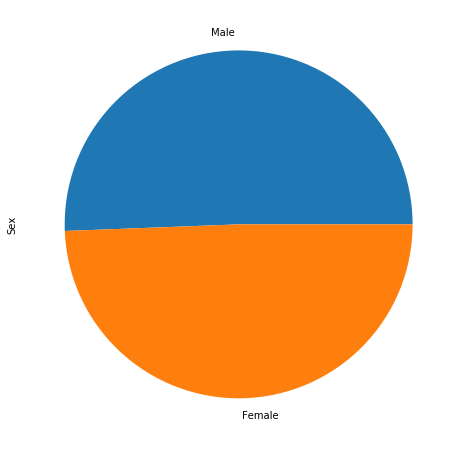

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot = single['Sex'].value_counts().plot.pie(y='Sex', figsize=(8, 8))

In [14]:
single['Sex'].value_counts()

Male      958
Female    935
Name: Sex, dtype: int64

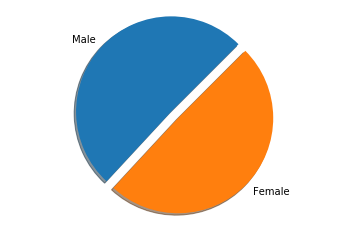

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Male', 'Female'

sizes = [958, 935]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=45)
ax1.axis('equal')

plt.show()

## Quartiles, outliers and boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
TRegimes = single[single["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
TRegimes = TRegimes.sort_values(["Timepoint"], ascending=True)
TRegimes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1391,q132,Infubinol,Female,1,30,0,45.000000,0
195,i738,Capomulin,Female,23,20,0,45.000000,0
205,a520,Ramicane,Male,13,21,0,45.000000,0
1370,p438,Ceftamin,Female,11,26,0,45.000000,0
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [17]:
data = TRegimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [18]:
data2 = data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
data2.head()

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
Name: Tumor Volume (mm3), dtype: float64

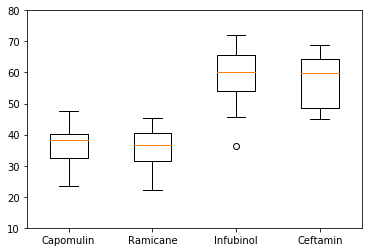

In [19]:
TRegime_df = data2.to_frame()
TRegime_df

top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
last = TRegime_df.reset_index()
tumor = last.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor2 = pd.DataFrame(tumor)
tumor2 = tumor2.reindex(top_4)
volume = [vol for vol in tumor2['Tumor Volume (mm3)']]
plt.boxplot(volume, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and scatter plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lplot = single[single["Mouse ID"].isin(["j119"])]
lplot

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
328,j119,Capomulin,Female,7,23,0,45.000000,0
329,j119,Capomulin,Female,7,23,5,45.838998,0
330,j119,Capomulin,Female,7,23,10,46.425366,0
331,j119,Capomulin,Female,7,23,15,47.322984,0
332,j119,Capomulin,Female,7,23,20,48.158209,1
333,j119,Capomulin,Female,7,23,25,42.417166,1
334,j119,Capomulin,Female,7,23,30,43.013681,1
335,j119,Capomulin,Female,7,23,35,43.765705,1
336,j119,Capomulin,Female,7,23,40,44.585090,1
337,j119,Capomulin,Female,7,23,45,38.125164,1


In [21]:
dataCap = lplot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
dataCap

,Mouse ID,Timepoint,Tumor Volume (mm3)
328,j119,0,45.000000
329,j119,5,45.838998
330,j119,10,46.425366
331,j119,15,47.322984
332,j119,20,48.158209
333,j119,25,42.417166
334,j119,30,43.013681
335,j119,35,43.765705
336,j119,40,44.585090
337,j119,45,38.125164


In [22]:
lplot2 = dataCap.reset_index()
lplot2

,index,Mouse ID,Timepoint,Tumor Volume (mm3)
0,328,j119,0,45.000000
1,329,j119,5,45.838998
2,330,j119,10,46.425366
3,331,j119,15,47.322984
4,332,j119,20,48.158209
5,333,j119,25,42.417166
6,334,j119,30,43.013681
7,335,j119,35,43.765705
8,336,j119,40,44.585090
9,337,j119,45,38.125164


In [23]:
lplot3 = lplot2[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
lplot3

,Mouse ID,Timepoint,Tumor Volume (mm3)
0,j119,0,45.000000
1,j119,5,45.838998
2,j119,10,46.425366
3,j119,15,47.322984
4,j119,20,48.158209
5,j119,25,42.417166
6,j119,30,43.013681
7,j119,35,43.765705
8,j119,40,44.585090
9,j119,45,38.125164


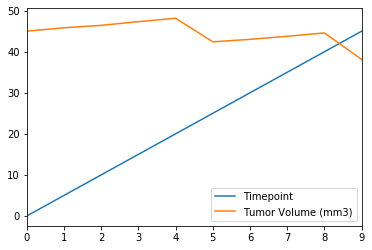

In [24]:
lines = lplot3.plot.line()

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin = single[single["Drug Regimen"].isin(["Capomulin"])]
capomulin_data = TRegimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capomulin_sorted = capomulin_data.sort_values(["Weight (g)"], ascending=True)
capomulinx = capomulin.reset_index()

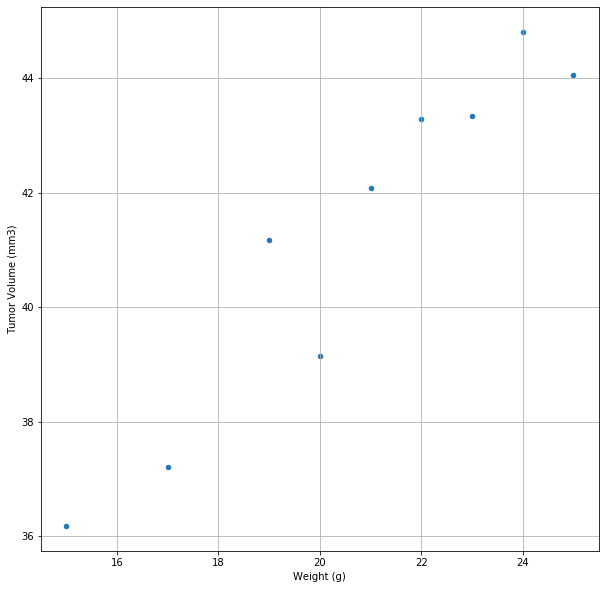

In [31]:
capomulinw = capomulinx.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capomulinplot = pd.DataFrame(capomulinw).reset_index()
capomulin_scatter = capomulinplot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (10,10))
capomulin_scatter

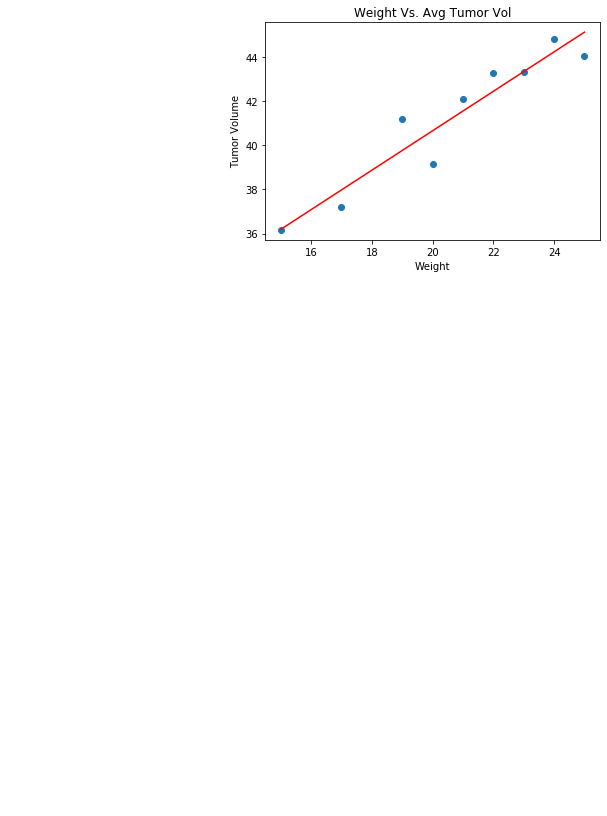

In [37]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x = capomulinplot["Weight (g)"]
y = capomulinplot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
linear_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regression,"r-")
plt.annotate(linear_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()